In [81]:
import numpy as np
import scipy.io as sio
import matplotlib.lines as lines
import matplotlib.pyplot as plt

In [82]:
%run gp.py
%run kernel_gp.py
%run rf_gp.py

In [83]:
#inverted pendulum

data = sio.loadmat('invpendulum_data.mat')
x_train = data['x_gp']
u_train = data['u_gp']
z_train = data['z_gp']
y_train= np.concatenate((np.ones((len(u_train),1)), u_train), axis=1)
z_train = z_train.flatten()
k_pen = KernelGP(x_train, y_train, z_train)
rf_pen = RandomFeaturesGP(x_train, y_train, z_train)
k_pen.train()
k_pen.c_train()
rf_pen.train()
rf_pen.c_train()
kpred_pen = k_pen.test(x_train)
rfpred_pen = rf_pen.test(x_train)

print(f'kernel training time{k_pen.training_time}, rf training time{rf_pen.training_time}')
print(f'kernel test time{k_pen.test_time}, rf test time{rf_pen.test_time}')

kernel training time0.0021587940000245, rf training time0.02845535899996321
kernel test time0.0009292690001529991, rf test time0.003866080000079819


In [84]:
dif_k = np.abs(k_pen.kernel-rf_pen.estimate_kernel())
dif_ck = np.abs(k_pen.c_kernel-rf_pen.estimate_ckernel())
mean_dif_k = np.mean(dif_k <.01)
mean_dif_ck = np.mean(dif_ck < .01)
print(f'Mean diff kernel: {mean_dif_k}, Mean diff compound kernel {mean_dif_ck}')


#print(f'difference in kernel estimate:{dif_k}')
print('rf_error',la.norm(k_pen.test(x_train)- z_train),\
      'kernel error',la.norm(rf_pen.test(x_train)-z_train))

Mean diff kernel: 0.7205472932778109, Mean diff compound kernel 0.6367400356930398
rf_error 6.4925653666589564 kernel error 6.516441582908469


<Figure size 432x288 with 0 Axes>

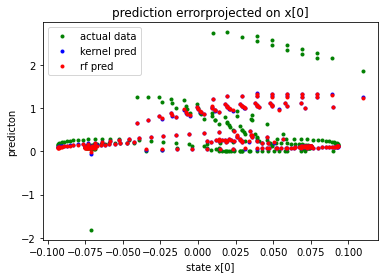

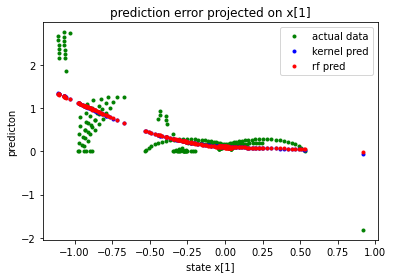

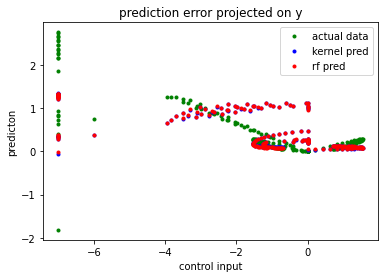

<Figure size 432x288 with 0 Axes>

In [85]:
plt.plot(x_train[:,0], z_train, 'g.', label = 'actual data')
plt.plot(x_train[:,0], kpred_pen, 'b.', label = 'kernel pred')
plt.plot(x_train[:,0], rfpred_pen, 'r.', label = 'rf pred')
plt.xlabel('state x[0]')
plt.ylabel('predicton')
plt.title('prediction errorprojected on x[0]')
plt.legend()
plt.draw()
plt.figure()

plt.plot(x_train[:,1], z_train, 'g.', label = 'actual data')
plt.plot(x_train[:,1], kpred_pen, 'b.', label = 'kernel pred')
plt.plot(x_train[:,1], rfpred_pen, 'r.', label = 'rf pred')
plt.xlabel('state x[1]')
plt.ylabel('predicton')
plt.title('prediction error projected on x[1]')
plt.legend()
plt.draw()
plt.figure()

plt.plot(y_train[:,1], z_train, 'g.', label = 'actual data')
plt.plot(y_train[:,1], kpred_pen, 'b.', label = 'kernel pred')
plt.plot(y_train[:,1], rfpred_pen, 'r.', label = 'rf pred')
plt.xlabel('control input')
plt.ylabel('predicton')
plt.title('prediction error projected on y')
plt.legend()
plt.draw()
plt.figure()

In [86]:
#ACC

data = sio.loadmat('acc_all.mat')
x_train = data['allx'].T
y_train = data['ally'].T
z_train = data['allz']
#for smaller data size
# data = sio.loadmat('acc_data.mat')
# x_train = data['xs_train'].T
# y_train = data['ys_train'].T
# z_train = data['zs_train']

z_train = z_train[0,:] # IMPORTANT (use either z_train[1,:] or [0,:] for CBF/CLF training)
z_train = z_train.flatten()
k_acc = KernelGP(x_train, y_train, z_train)
rf_acc = RandomFeaturesGP(x_train, y_train, z_train)
k_acc.train()
k_acc.c_train()
rf_acc.train()
rf_acc.c_train()
kpred_acc = k_acc.test(x_train)
kcpred_acc = k_acc.c_test(y_train)
rfpred_acc = rf_acc.test(x_train)
rfcpred_acc = rf_acc.c_test(y_train)

print(f'kernel training time{k_acc.training_time}, rf training time{rf_acc.training_time}')
print(f'kernel test time{k_acc.test_time}, rf test time{rf_acc.test_time}')
kc_error = np.sqrt(np.sum(np.square(kcpred_acc - z_train)))
rf_error = np.sqrt(np.sum(np.square(rfpred_acc - z_train)))
rfc_error = np.sqrt(np.sum(np.square(rfcpred_acc - z_train)))
print(f'ckernel error{k_error},rfc error{rfc_error}')
print(f'kernel sigma: {np.sum(np.abs(k_acc.c_sigma(y_train)))}, \
            rf sigma: {np.sum(np.abs(rf_acc.c_sigma()))}')
# rf_d= np.arange(100,1000,50)
# for x in rf_d:
#     self.rf_d = x
    

kernel training time0.3060300009992716, rf training time0.04204519300037646
kernel test time0.057909619999918505, rf test time0.05330684900036431
ckernel error0.0005476758908125401,rfc error0.000441470903640036
kernel sigma: 20149872317558.992,             rf sigma: 275.8650927474812


<Figure size 432x288 with 0 Axes>

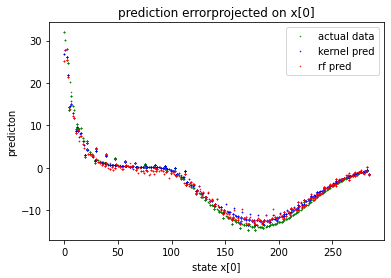

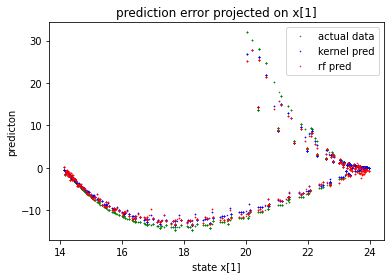

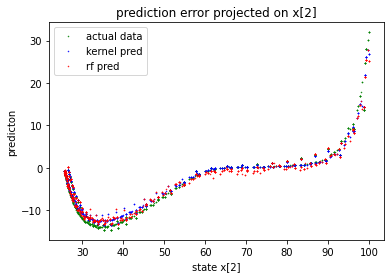

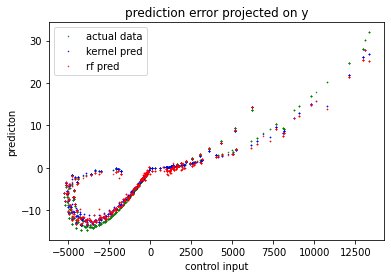

<Figure size 432x288 with 0 Axes>

In [87]:
plt.plot(x_train[:,0],z_train, 'g.', label = 'actual data', markersize =1 )
plt.plot(x_train[:,0], kpred_acc, 'b.', label = 'kernel pred',markersize =1 )
plt.plot(x_train[:,0],rfpred_acc, 'r.', label = 'rf pred',markersize =1 )
plt.xlabel('state x[0]')
plt.ylabel('predicton')
plt.title('prediction errorprojected on x[0]')
plt.legend()
plt.draw()
plt.savefig("x0")
plt.figure()

plt.plot(x_train[:,1],z_train, 'g.', label = 'actual data', markersize =1)
plt.plot(x_train[:,1], kpred_acc, 'b.', label = 'kernel pred', markersize =1)
plt.plot(x_train[:,1],rfpred_acc, 'r.', label = 'rf pred', markersize =1)
plt.xlabel('state x[1]')
plt.ylabel('predicton')
plt.title('prediction error projected on x[1]')
plt.legend()
plt.draw()
plt.savefig("x1")
plt.figure()

plt.plot(x_train[:,2],z_train, 'g.', label = 'actual data', markersize =1)
plt.plot(x_train[:,2], kpred_acc, 'b.', label = 'kernel pred', markersize =1)
plt.plot(x_train[:,2],rfpred_acc, 'r.', label = 'rf pred', markersize =1)
plt.xlabel('state x[2]')
plt.ylabel('predicton')
plt.title('prediction error projected on x[2]')
plt.legend()
plt.draw()
plt.savefig("x2")
plt.figure()

plt.plot(y_train[:,1],z_train, 'g.', label = 'actual data', markersize =1)
plt.plot(y_train[:,1], kpred_acc, 'b.', label = 'kernel pred', markersize =1)
plt.plot(y_train[:,1],rfpred_acc, 'r.', label = 'rf pred', markersize =1)
plt.xlabel('control input')
plt.ylabel('predicton')
plt.title('prediction error projected on y')
plt.legend()
plt.draw()
plt.savefig("y")
plt.figure()


In [60]:
print(k_acc.y_train.shape)

(1160, 2)
